# Lab 1

**Name:** Aman khoja
<br>**ID:** 9054613
<br>**Section:** 1

**1. Framing the Problem - Describe the goal of this report (0.5 point).**

# **Goal**

The goal of this regression analysis report is to train and evaluate three different univariate linear regression models by using the following median house-independent variables: median income, population, and number of households- to estimate the value of a house. This shall be done through exploration, fitting of the models, and model performance evaluation by metrics like Mean Squared Error and Mean Absolute Error.

**2. Getting the Data - hyperlink to the source (0.25 point) and load into Pandas (0.25 point).**

In [94]:
# Import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
# Read dataset
data = pd.read_csv('./housing.csv')

# Display a few rows
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


**3.1 Explore statistics (e.g. using Pandas `describe` function)**

In [96]:
# Statistics using the describe function
print(data[['housing_median_age', 'population', 'households', 'median_income']].describe())

       housing_median_age    population    households  median_income
count        20640.000000  20640.000000  20640.000000   20640.000000
mean            28.639486   1425.476744    499.539680       3.870671
std             12.585558   1132.462122    382.329753       1.899822
min              1.000000      3.000000      1.000000       0.499900
25%             18.000000    787.000000    280.000000       2.563400
50%             29.000000   1166.000000    409.000000       3.534800
75%             37.000000   1725.000000    605.000000       4.743250
max             52.000000  35682.000000   6082.000000      15.000100


**3.2 Create three Seaborn scatter plots of median house value vs. median income, population and number of households. There should be one scatter plot per each independent variable. Add a title to each graph (using Seaborn). Provide textual interpretation of the graphs, and insights specific to the linear regression you are going to conduct next. (1 point).**

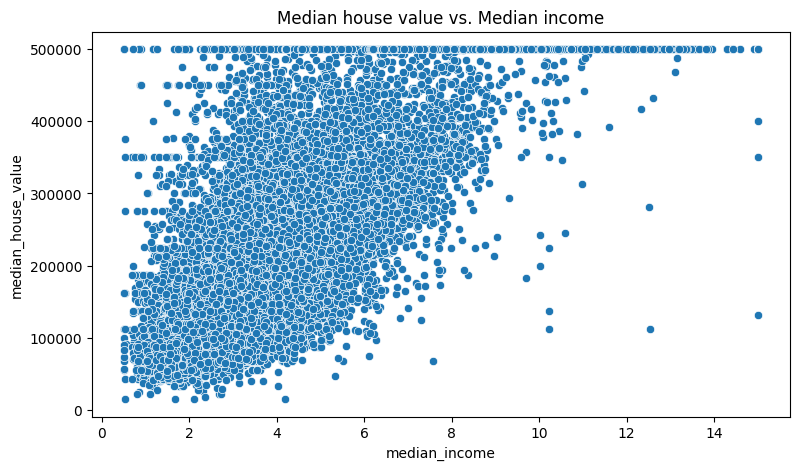

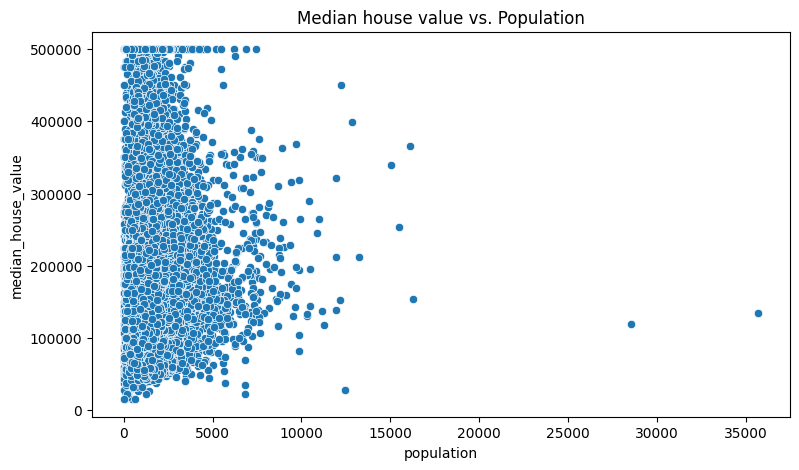

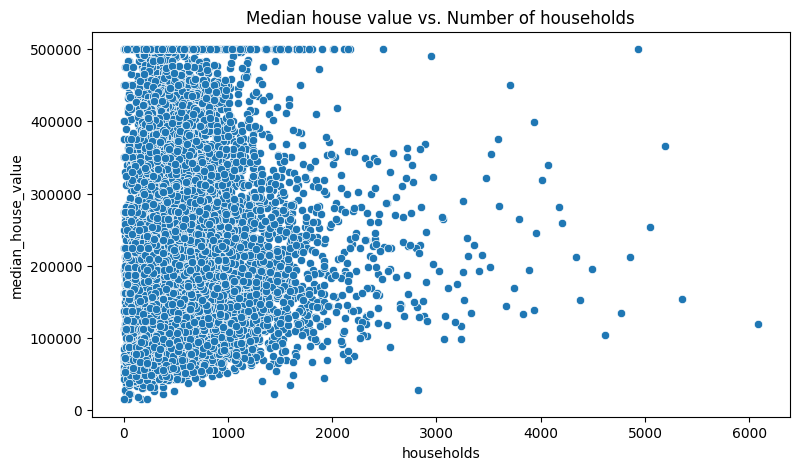

In [97]:
# Scatter plot for median house vs. median income
plt.figure(figsize=(9,5))
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Median house value vs. Median income')
plt.show()

# Scatter plot for median house value vs. population 
plt.figure(figsize=(9,5))
sns.scatterplot(x='population', y='median_house_value', data=data)
plt.title('Median house value vs. Population')
plt.show()

# Scatter plot for median house value vs. population 
plt.figure(figsize=(9,5))
sns.scatterplot(x='households', y='median_house_value', data=data)
plt.title('Median house value vs. Number of households')
plt.show()

### **Interpretation:** 
**Median Income vs. Median House Value:** There seems to be a positive linear relationship, with increases in median income reflecting increases in median house value.
<br><br>
**Population vs. Median House Value :** No real trend is observable, and there is certainly no strong linear one.
 <br><br>
**Number of Households vs. Median House Value :** Like in population, there is no strong linear relationship.


### **Description of the variables:**
**Median House Value:** It is the median value of the owner-occupied houses. It is a dependent variable. Range : 
14,999 to 500,001.

**Median Income:** It contains median income of households. Range: 
0.4999 to 15.0001

**Population:** The population of the area. Range: 
3 to 35,682

**Number of households:** The number of households in the area. Range: 
1 to 6,082.

**4. Run three linear regressions (fitting) between (1.5 point)**

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. median house value vs. Median income
x1 = data[['median_income']]
y = data[['median_house_value']]
model1 = LinearRegression()
model1.fit(x1,y)
y_pred1 = model1.predict(x1)
mse1 = mean_squared_error(y, y_pred1)
mae1 = mean_absolute_error(y, y_pred1)

# 2. Median house value vs. population
x2 = data[['population']]
model2 = LinearRegression()
model2.fit(x2,y)
y_pred2 = model2.predict(x2)
mse2 = mean_squared_error(y, y_pred2)
mae2 = mean_absolute_error(y, y_pred2)

# 3. Median house value vs. Households
x3 = data[['households']]
model3 = LinearRegression()
model3.fit(x3,y)
y_pred3 = model3.predict(x3)
mse3 = mean_squared_error(y, y_pred3)
mae3 = mean_absolute_error(y, y_pred3)

In [99]:
# Create a table for a result
results = {
    'Model': ['Median Income', 'Population', 'Number of Households'],
    'Intercept': [model1.intercept_, model2.intercept_, model3.intercept_],
    'Slope': [model1.coef_[0], model2.coef_[0], model3.coef_[0]],
    'MSE': [mse1, mse2, mse3],
    'MAE': [mae1, mae2, mae3]
}
results_df = pd.DataFrame(results)
print(results_df)

                  Model             Intercept                 Slope  \
0         Median Income    [45085.5767032679]  [41793.849201896286]   
1            Population  [210436.26207627333]  [-2.511752774615085]   
2  Number of Households  [196928.57716233088]  [19.872775155643875]   

            MSE           MAE  
0  7.011312e+09  62625.933791  
1  1.330741e+10  91153.820095  
2  1.325778e+10  90802.743243  


**5. In a single table for all three linear regressions, provide per regression model (1.5 points):**

**Median house value vs. Median income**

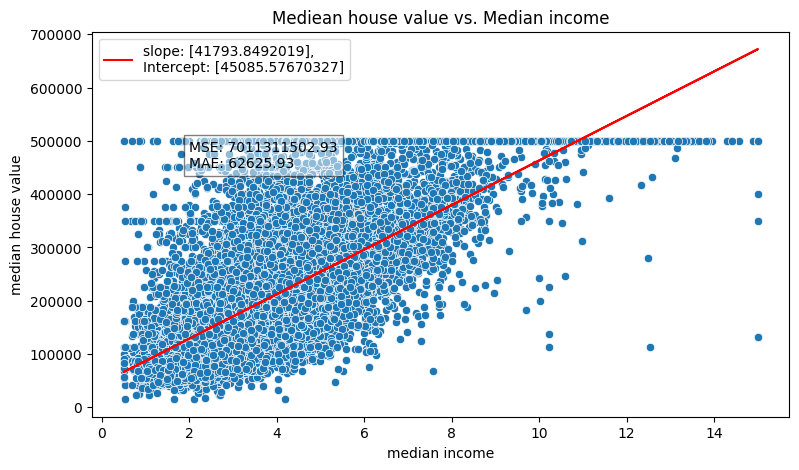

In [100]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='median_income', y='median_house_value', data=data)

slope = model1.coef_[0]
intercept = model1.intercept_

# Plotting the data and the regression line
plt.plot(x1, y_pred1, color='red', label=f'slope: {slope},\nIntercept: {intercept}')
plt.xlabel('median income')
plt.ylabel('median house value')
plt.title('Mediean house value vs. Median income')
plt.text(2, 450000, f'MSE: {mse1:.2f}\nMAE: {mae1:.2f}', bbox=dict(facecolor='white', alpha=0.5))
plt.legend()
plt.show()

**Mediean house value vs. Population**

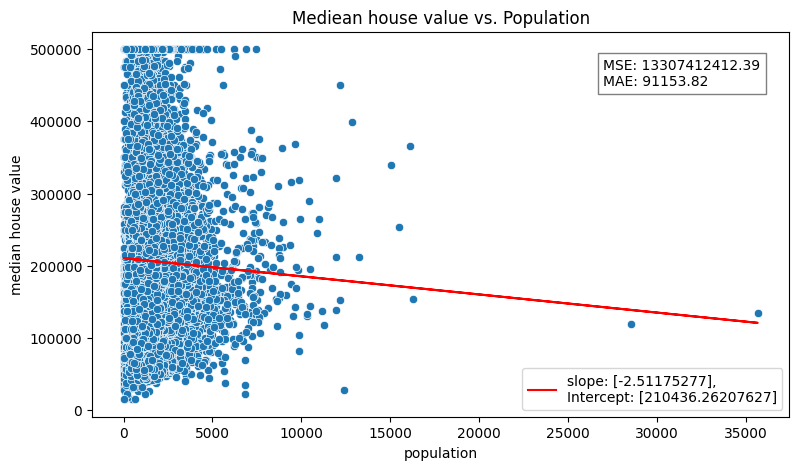

In [101]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='population', y='median_house_value', data=data)

slope = model2.coef_[0]
intercept = model2.intercept_

# Plotting the data and the regression line
plt.plot(x2, y_pred2, color='red', label=f'slope: {slope},\nIntercept: {intercept}')
plt.xlabel('population')
plt.ylabel('median house value')
plt.title('Mediean house value vs. Population')
plt.text(27000, 450000, f'MSE: {mse2:.2f}\nMAE: {mae2:.2f}', bbox=dict(facecolor='white', alpha=0.5))
plt.legend()
plt.show()

**Mediean house value vs. Households**

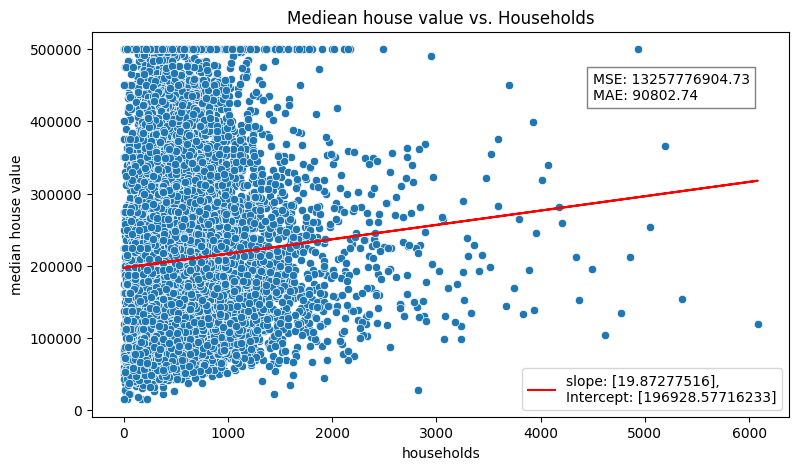

In [102]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='households', y='median_house_value', data=data)

slope = model3.coef_[0]
intercept = model3.intercept_

# Plotting the data and the regression line
plt.plot(x3, y_pred3, color='red', label=f'slope: {slope},\nIntercept: {intercept}')
plt.xlabel('households')
plt.ylabel('median house value')
plt.title('Mediean house value vs. Households')
plt.text(4500, 430000, f'MSE: {mse3:.2f}\nMAE: {mae3:.2f}', bbox=dict(facecolor='white', alpha=0.5))
plt.legend()
plt.show()

## **Summary**

**Model Comparison:** It can be observed that the independent variable of median income has the minimum MSE and MAE, which best fits the response variable, Median House Value. The other two models, involving population and household count, comparatively show a very poor performance, as revealed by their larger values of MSE and MAE.

**Insights:** Of these three variables, median income is the best predictor of median house value. Neither of the other two variables, population and number of households, is particularly strongly linearly related to median house value.